In [19]:
import seaborn as sns
import pandas as pd
import os
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, make_scorer
import joblib
import numpy as np

In [13]:
classifier = joblib.load('lgb.pkl')

In [16]:
new_data = pd.read_csv(f"three_state_pt2.csv")
new_data = new_data.drop(columns="Unnamed: 0")
new_data = new_data.sample(frac=1, random_state=42).reset_index(drop=True)
new_data_test = new_data.drop(columns="label")
new_data_label = new_data["label"]
# Predict on test set
new_pred = classifier.predict(new_data_test)
print(confusion_matrix(new_data['label'],new_pred, normalize= 'true'))

[[0.95273969 0.04086947 0.00639084]
 [0.24514376 0.72506112 0.02979512]
 [0.14352811 0.05325255 0.80321933]]


In [43]:
new_data_test.head()

,I1,Q1,I2,Q2
0,611.997178,-6473.868073,5600.498302,-6553.424652
1,6591.613386,-5665.704290,6509.476148,-1424.495346
2,-2914.016227,-3483.956890,-1474.289441,-4679.038148
3,4180.930153,-9288.693230,6001.671688,-1915.260757
4,1749.050554,-4976.269819,5900.212048,-8247.578963


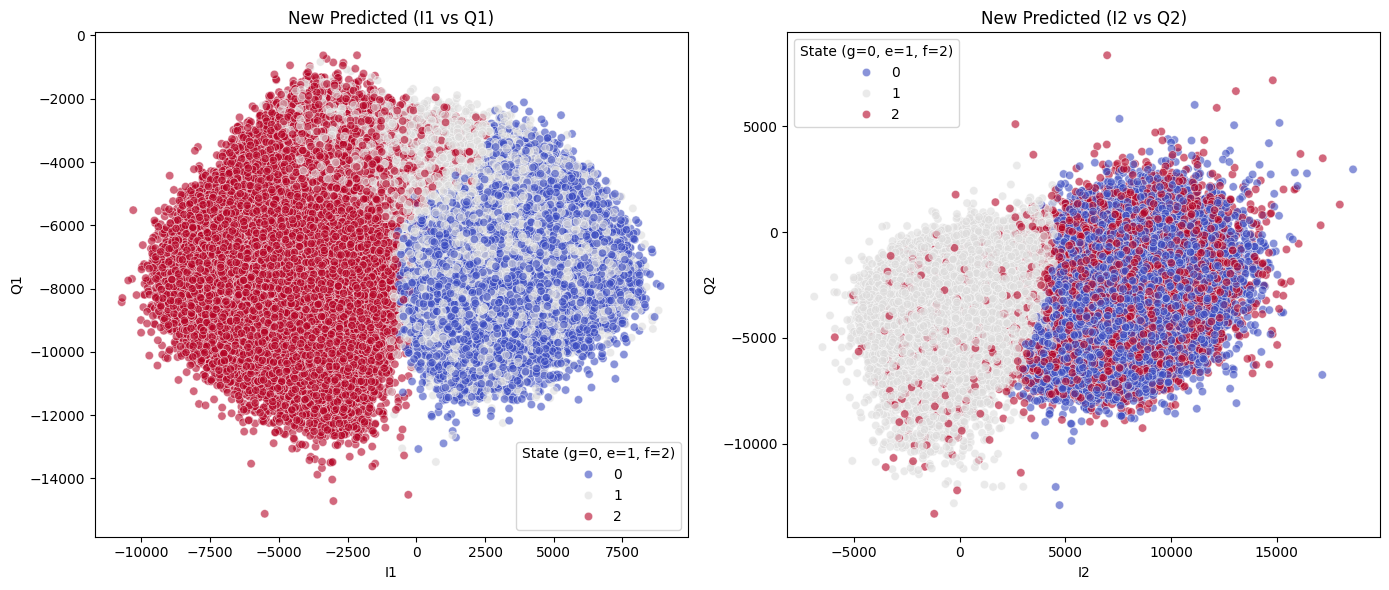

In [17]:
# Convert test data into a DataFrame for easier plotting
new_test_df = pd.DataFrame(new_data, columns=["I1", "Q1", "I2", "Q2", "label"])
new_test_df["predicted"] = new_pred  # Add predicted labels # Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: I1 vs Q1
sns.scatterplot(
    data=new_test_df,
    x="I1",
    y="Q1",
    hue="predicted",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[0],
)
axes[0].set_xlabel("I1")
axes[0].set_ylabel("Q1")
axes[0].set_title("New Predicted (I1 vs Q1)")
axes[0].legend(title="State (g=0, e=1, f=2)")

# Second subplot: I2 vs Q2
sns.scatterplot(
    data=new_test_df,
    x="I2",
    y="Q2",
    hue="predicted",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[1],
)
axes[1].set_xlabel("I2")
axes[1].set_ylabel("Q2")
axes[1].set_title("New Predicted (I2 vs Q2)")
axes[1].legend(title="State (g=0, e=1, f=2)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()